# URLs Prediction

__Goal__: 
* User input link
* We predict probability of it being malicious
    * 100 - Benign %

In [731]:
import pandas as pd

# https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset?resource=download
df = pd.read_csv('malicious_phish.csv')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [732]:
df_enc = pd.get_dummies(df, columns=['type'], dtype=int)
df_enc.head()

,url,type_benign,type_defacement,type_malware,type_phishing
0,br-icloud.com.br,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0


In [733]:
%matplotlib inline
import matplotlib.pyplot as plt
# Perform exploratory analysis
# Idea from
# https://towardsdatascience.com/extracting-feature-vectors-from-url-strings-for-malicious-url-detection-cbafc24737a
# Length of URL
df_enc['url_length'] = df_enc['url'].apply(len)
df_enc.head()

,url,type_benign,type_defacement,type_malware,type_phishing,url_length
0,br-icloud.com.br,0,0,0,1,16
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0,35
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0,31
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0,88
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0,235


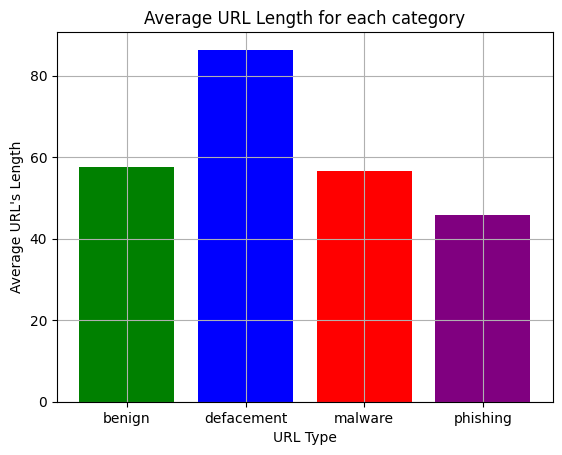

In [734]:
# Average length of URL of each type

avg_benign = df_enc[df_enc['type_benign'] == 1]['url_length'].mean()
avg_defacce = df_enc[df_enc['type_defacement'] == 1]['url_length'].mean()
avg_malware = df_enc[df_enc['type_malware'] == 1]['url_length'].mean()
avg_phishing = df_enc[df_enc['type_phishing'] == 1]['url_length'].mean()

url_length = {
    'benign': avg_benign,
    'defacement': avg_defacce,
    'malware': avg_malware,
    'phishing': avg_phishing
}

plt.bar(
    url_length.keys(),
    url_length.values(),
    color=['green', 'blue', 'red', 'purple']
)
plt.xlabel("URL Type")
plt.ylabel("Average URL's Length")
plt.title("Average URL Length for each category")
plt.grid()

plt.show()

In [735]:
# Containing HTTPS:
df_enc['contain_https'] = df['url'].str.contains('https').astype(int)
df_enc

,url,type_benign,type_defacement,type_malware,type_phishing,url_length,contain_https
0,br-icloud.com.br,0,0,0,1,16,0
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0,88,0
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0,235,0
...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,0,0,0,1,39,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,0,0,1,44,0
651188,www.gamespot.com/xbox360/action/deadspace/,0,0,0,1,42,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),0,0,0,1,45,0


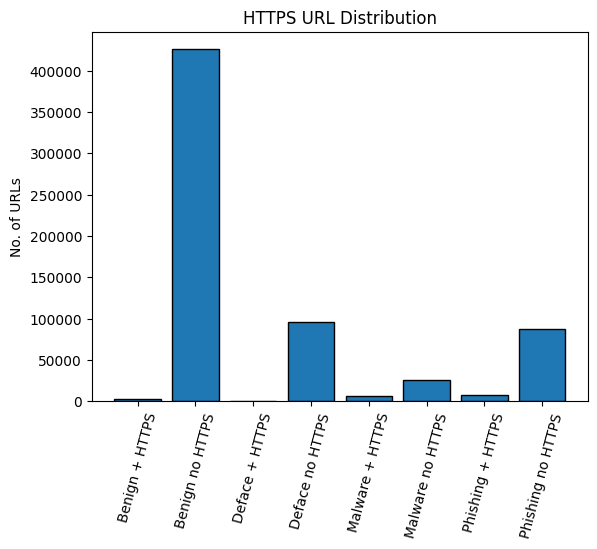

In [736]:
# Map HTTPS to type
type_https = {
    'Benign + HTTPS': df_enc[(df_enc['type_benign'] == 1) & (df_enc['contain_https'] == True)].shape[0],
    'Benign no HTTPS': df_enc[(df_enc['type_benign'] == 1) & (df_enc['contain_https'] == False)].shape[0],
    'Deface + HTTPS': df_enc[(df_enc['type_defacement'] == 1) & (df_enc['contain_https'] == True)].shape[0],
    'Deface no HTTPS': df_enc[(df_enc['type_defacement'] == 1) & (df_enc['contain_https'] == False)].shape[0],
    'Malware + HTTPS': df_enc[(df_enc['type_malware'] == 1) & (df_enc['contain_https'] == True)].shape[0],
    'Malware no HTTPS': df_enc[(df_enc['type_malware'] == 1) & (df_enc['contain_https'] == False)].shape[0],
    'Phishing + HTTPS': df_enc[(df_enc['type_phishing'] == 1) & (df_enc['contain_https'] == True)].shape[0],
    'Phishing no HTTPS': df_enc[(df_enc['type_phishing'] == 1) & (df_enc['contain_https'] == False)].shape[0],
}

plt.bar(
    type_https.keys(),
    type_https.values(),
    ec="k"
)

plt.ylabel("No. of URLs")
plt.xticks(rotation=75)
plt.title("HTTPS URL Distribution")
plt.show()

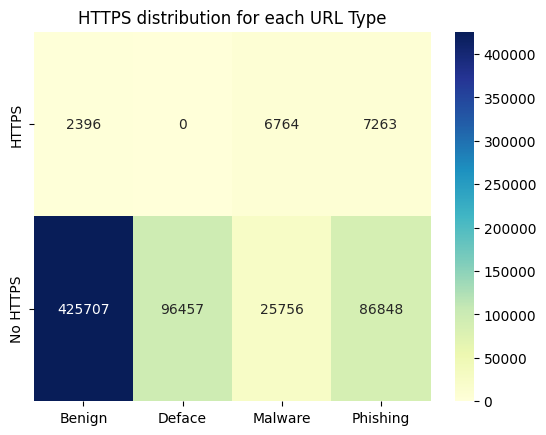

In [737]:
# Since the above one is confusing, let's make a matrix
import seaborn as sns

confusion_matrix = pd.DataFrame({
    'Benign': [df_enc[(df_enc['type_benign'] == 1) & (df_enc['contain_https'] == 1)].shape[0],
               df_enc[(df_enc['type_benign'] == 1) & (df_enc['contain_https'] == 0)].shape[0]],
    'Deface': [df_enc[(df_enc['type_defacement'] == 1) & (df_enc['contain_https'] == 1)].shape[0],
               df_enc[(df_enc['type_defacement'] == 1) & (df_enc['contain_https'] == 0)].shape[0]],
    'Malware': [df_enc[(df_enc['type_malware'] == 1) & (df_enc['contain_https'] == 1)].shape[0],
                df_enc[(df_enc['type_malware'] == 1) & (df_enc['contain_https'] == 0)].shape[0]],
    'Phishing': [df_enc[(df_enc['type_phishing'] == 1) & (df_enc['contain_https'] == 1)].shape[0],
                 df_enc[(df_enc['type_phishing'] == 1) & (df_enc['contain_https'] == 0)].shape[0]]
}, index=['HTTPS', 'No HTTPS'])

# Show heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('HTTPS distribution for each URL Type')
plt.show()

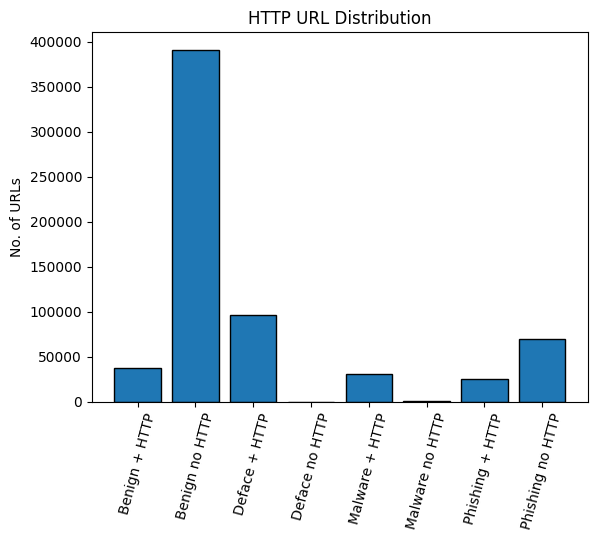

In [738]:
# Same thing but with HTTP
df_enc['contain_http'] = df['url'].str.contains('http').astype(int)

type_http = {
    'Benign + HTTP': df_enc[(df_enc['type_benign'] == 1) & (df_enc['contain_http'] == 1)].shape[0],
    'Benign no HTTP': df_enc[(df_enc['type_benign'] == 1) & (df_enc['contain_http'] == 0)].shape[0],
    'Deface + HTTP': df_enc[(df_enc['type_defacement'] == 1) & (df_enc['contain_http'] == 1)].shape[0],
    'Deface no HTTP': df_enc[(df_enc['type_defacement'] == 1) & (df_enc['contain_http'] == 0)].shape[0],
    'Malware + HTTP': df_enc[(df_enc['type_malware'] == 1) & (df_enc['contain_http'] == 1)].shape[0],
    'Malware no HTTP': df_enc[(df_enc['type_malware'] == 1) & (df_enc['contain_http'] == 0)].shape[0],
    'Phishing + HTTP': df_enc[(df_enc['type_phishing'] == 1) & (df_enc['contain_http'] == 1)].shape[0],
    'Phishing no HTTP': df_enc[(df_enc['type_phishing'] == 1) & (df_enc['contain_http'] == 0)].shape[0],
}

plt.bar(
    type_http.keys(),
    type_http.values(),
    ec="k"
)

plt.title("HTTP URL Distribution")
plt.ylabel("No. of URLs")
plt.xticks(rotation=75)
plt.show()

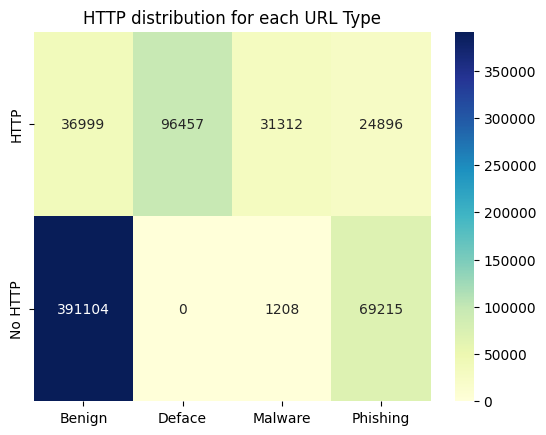

In [739]:
confusion_matrix_http = pd.DataFrame({
    'Benign': [df_enc[(df_enc['type_benign'] == 1) & (df_enc['contain_http'] == 1)].shape[0],
               df_enc[(df_enc['type_benign'] == 1) & (df_enc['contain_http'] == 0)].shape[0]],
    'Deface': [df_enc[(df_enc['type_defacement'] == 1) & (df_enc['contain_http'] == 1)].shape[0],
               df_enc[(df_enc['type_defacement'] == 1) & (df_enc['contain_http'] == 0)].shape[0]],
    'Malware': [df_enc[(df_enc['type_malware'] == 1) & (df_enc['contain_http'] == 1)].shape[0],
                df_enc[(df_enc['type_malware'] == 1) & (df_enc['contain_http'] == 0)].shape[0]],
    'Phishing': [df_enc[(df_enc['type_phishing'] == 1) & (df_enc['contain_http'] == 1)].shape[0],
                 df_enc[(df_enc['type_phishing'] == 1) & (df_enc['contain_http'] == 0)].shape[0]]
}, index=['HTTP', 'No HTTP'])

# Show heatmap
sns.heatmap(confusion_matrix_http, annot=True, fmt='d', cmap="YlGnBu")
plt.title('HTTP distribution for each URL Type')
plt.show()

In [740]:
import re
# https://stackoverflow.com/questions/6531482/how-to-check-if-a-string-contains-an-element-from-a-list-in-python
from urllib.parse import urlparse
import os
# List of common file extensions
common_file_extensions = [
    '.txt', '.pdf', '.doc', '.docx', '.xls', '.xlsx', '.ppt', '.pptx', 
    '.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.svg', 
    '.mp3', '.wav', '.ogg', '.flac', 
    '.mp4', '.mkv', '.avi', '.mov', '.wmv', 
    '.zip', '.rar', '.tar', '.gz', '.7z', 
    '.js', '.json', '.xml', 
    '.py', '.java', '.cpp', '.c', '.cs', '.php', '.rb', '.go', 
    '.sql', '.db', '.sqlite', '.mdb', '.accdb', 
    '.exe', '.dll', '.bin', '.iso', '.dmg', 
    '.csv', '.tsv', '.log', '.md'
]

# # Construct regex pattern from file extensions to match anywhere in the URL
# pattern = '|'.join([re.escape(ext) for ext in common_file_extensions])

# # Add a column to indicate if the URL contains any common file extension
# df_enc['contain_file'] = df_enc['url'].str.contains(pattern, case=False, regex=True).astype(int)
def contain_file(url: str)->int:
    path = urlparse(url).path
    ext = os.path.splitext(path)[1]
    if ext in common_file_extensions:
        return 1
    else:
        return 0
    

df_enc['contain_file'] = df_enc['url'].apply(contain_file)


# Display the dataframe
df_enc.head()

,url,type_benign,type_defacement,type_malware,type_phishing,url_length,contain_https,contain_http,contain_file
0,br-icloud.com.br,0,0,0,1,16,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0,35,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0,31,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0,88,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0,235,0,1,1


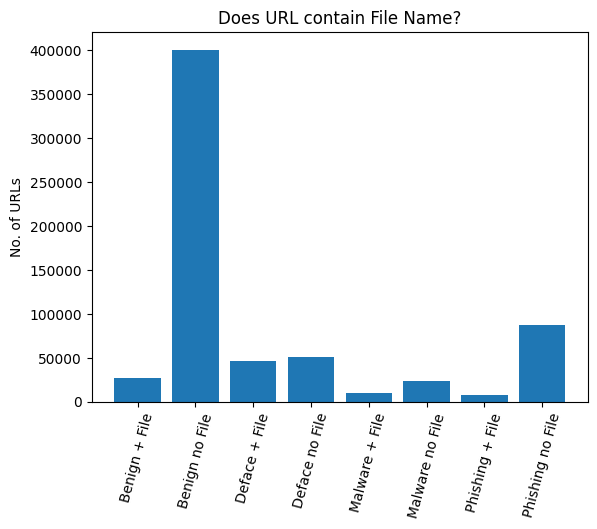

In [741]:
contain_File = {
    'Benign + File': df_enc[(df_enc['type_benign'] == 1) & (df_enc['contain_file'] == 1)].shape[0],
    'Benign no File': df_enc[(df_enc['type_benign'] == 1) & (df_enc['contain_file'] == 0)].shape[0],
    'Deface + File': df_enc[(df_enc['type_defacement'] == 1) & (df_enc['contain_file'] == 1)].shape[0],
    'Deface no File': df_enc[(df_enc['type_defacement'] == 1) & (df_enc['contain_file'] == 0)].shape[0],
    'Malware + File': df_enc[(df_enc['type_malware'] == 1) & (df_enc['contain_file'] == 1)].shape[0],
    'Malware no File': df_enc[(df_enc['type_malware'] == 1) & (df_enc['contain_file'] == 0)].shape[0],
    'Phishing + File': df_enc[(df_enc['type_phishing'] == 1) & (df_enc['contain_file'] == 1)].shape[0],
    'Phishing no File': df_enc[(df_enc['type_phishing'] == 1) & (df_enc['contain_file'] == 0)].shape[0],
}

plt.bar(
    contain_File.keys(),
    contain_File.values()
)

plt.title("Does URL contain File Name?")
plt.ylabel("No. of URLs")
plt.xticks(rotation=75)
plt.show()

,url,type_benign,type_defacement,type_malware,type_phishing,url_length,contain_https,contain_http,contain_file,contain_executable
0,br-icloud.com.br,0,0,0,1,16,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0,35,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0,31,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0,88,0,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0,235,0,1,1,0


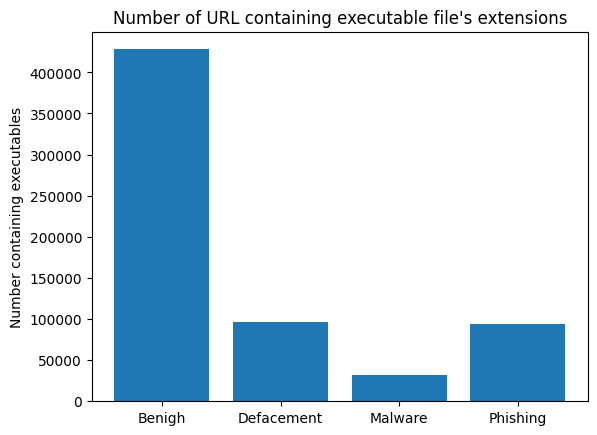

In [742]:
# Does URL contain Executable?
executable_file_extensions = [
    '.exe',    # Windows executable file
    '.dll',    # Windows Dynamic Link Library
    '.bat',    # Batch file
    '.cmd',    # Windows command file
    '.msi',    # Windows installer package
    '.msp',    # Windows installer patch
    '.scr',    # Windows screen saver
    '.cpl',    # Windows Control Panel item
    '.sys',    # Windows system file
    '.vbs',    # VBScript file
    '.js',     # JavaScript file
    '.jse',    # Encoded JavaScript file
    '.wsf',    # Windows Script File
    '.wsh',    # Windows Script Host Settings file
    '.ps1',    # PowerShell script
    '.psm1',   # PowerShell module file
    '.ps1xml',  # PowerShell format and type definitions
    '.psc1',   # PowerShell console file
    '.psc2',   # PowerShell console file
    '.apk',    # Android application package
    '.app',    # macOS application
    '.command',  # macOS Terminal command
    '.gadget',  # Windows gadget
    '.inf',    # Setup information file
    '.ins',    # Internet communication settings
    '.inx',    # InstallShield Compiled Script
    '.ipa',    # iOS application
    '.isu',    # InstallShield Uninstaller Script
    '.job',    # Windows Task Scheduler job file
    '.lnk',    # Windows shortcut
    '.paf',    # Portable Application Format
    '.pif',    # Program Information File
    '.reg',    # Windows Registry file
    '.rgs',    # Registry Script
    '.sct',    # Windows Script Component
    '.shb',    # Windows Document Shortcut
    '.shs',    # Shell Scrap Object File
    '.u3p',    # U3 Smart Application
    '.vb',     # VBScript file
    '.vbe',    # Encoded VBScript file
    '.vbs',    # VBScript file
    '.vbscript',  # VBScript file
    '.ws',     # Windows Script file
    '.wsc',    # Windows Script Component
    '.wsf',    # Windows Script File
    '.wsh',    # Windows Script Host Settings file
    '.xbap',   # XAML Browser Application
    '.xex',    # Xbox Executable
    '.application',  # ClickOnce application installer
    '.gadget',  # Windows Vista sidebar gadget
    '.xap',    # Silverlight Application Package
]

def contain_exec(url: str)->int:
    path = urlparse(url).path
    ext = os.path.splitext(path)[1]
    if ext in executable_file_extensions:
        return 1
    else:
        return 0
    
    
df_enc['contain_executable'] = df_enc['url'].apply(contain_exec)

exec_distrib = {
    'Benigh': df_enc[df_enc['type_benign'] == 1]['contain_executable'].count(),
    'Defacement': df_enc[df_enc['type_defacement'] == 1]['contain_executable'].count(),
    'Malware': df_enc[df_enc['type_malware'] == 1]['contain_executable'].count(),
    'Phishing': df_enc[df_enc['type_phishing'] == 1]['contain_executable'].count(),
}

plt.bar(
    exec_distrib.keys(),
    exec_distrib.values()
)

plt.ylabel('Number containing executables')
plt.title("Number of URL containing executable file's extensions")

df_enc.head()

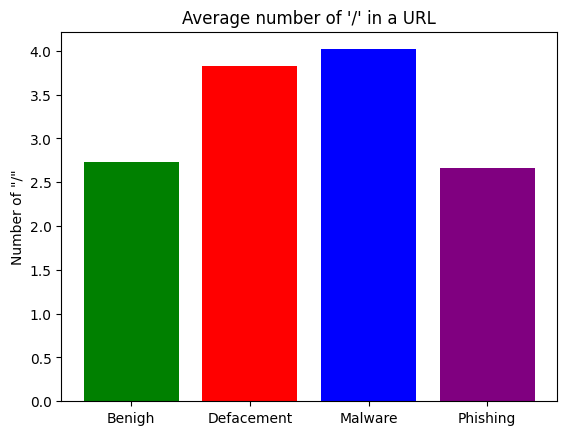

,url,type_benign,type_defacement,type_malware,type_phishing,url_length,contain_https,contain_http,contain_file,contain_executable,url_depth
0,br-icloud.com.br,0,0,0,1,16,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0,35,0,0,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0,31,0,0,0,0,3
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0,88,0,1,1,0,3
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0,235,0,1,1,0,3


In [743]:
# Depth of nesting (/)
df_enc['url_depth'] = df_enc['url'].str.count('/').astype(int)

depth_distrib = {
    'Benigh': df_enc[df_enc['type_benign'] == 1]['url_depth'].mean(),
    'Defacement': df_enc[df_enc['type_defacement'] == 1]['url_depth'].mean(),
    'Malware': df_enc[df_enc['type_malware'] == 1]['url_depth'].mean(),
    'Phishing': df_enc[df_enc['type_phishing'] == 1]['url_depth'].mean(),
}

plt.bar(
    depth_distrib.keys(),
    depth_distrib.values(),
    color=['green', 'red', 'blue', 'purple']
)
plt.title("Average number of '/' in a URL")
plt.ylabel('Number of "/"')
plt.show()
df_enc.head()

## Machine Learning

In [744]:
# Begin ML/DL
# 4 Type as Softmax
# Turn url into vector(?)
# Alternatively, ignore the url column and just extract info from url input


# Reordering so what we want is at the end
# data = data[[col for col in data.columns if col != 'd'] + ['d']]
# https://saturncloud.io/blog/pandas-tips-reorder-columns/
df_enc = df_enc[[col for col in df_enc.columns if col != 'type_benign'] + ['type_benign']]
df_enc = df_enc[[col for col in df_enc.columns if col != 'type_defacement'] + ['type_defacement']]
df_enc = df_enc[[col for col in df_enc.columns if col != 'type_malware'] + ['type_malware']]
df_enc = df_enc[[col for col in df_enc.columns if col != 'type_phishing'] + ['type_phishing']]
df_enc.head()

,url,url_length,contain_https,contain_http,contain_file,contain_executable,url_depth,type_benign,type_defacement,type_malware,type_phishing
0,br-icloud.com.br,16,0,0,0,0,0,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,35,0,0,0,0,2,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,31,0,0,0,0,3,1,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,88,0,1,1,0,3,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,235,0,1,1,0,3,0,1,0,0


In [745]:
# Helper function for input
def get_url_length(url: str) -> int:
    return len(url)


def contain_http(url:str)->int:
    if 'http' not in url.lower():
        return 0
    else:
        return 1


def contain_https(url:str)->int:
    if 'https' not in url.lower():
        return 0
    else:
        return 1
    
    
def url_depth(url:str)->int:
    return url.count('/')
    
# Contain file/executable has already been defined up there
df_enc.head()

,url,url_length,contain_https,contain_http,contain_file,contain_executable,url_depth,type_benign,type_defacement,type_malware,type_phishing
0,br-icloud.com.br,16,0,0,0,0,0,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,35,0,0,0,0,2,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,31,0,0,0,0,3,1,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,88,0,1,1,0,3,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,235,0,1,1,0,3,0,1,0,0


In [746]:
# Split: https://stackoverflow.com/questions/53991131/how-to-split-data-frame-into-x-and-y
X = df_enc.iloc[:, 1:-4]
y = df_enc.iloc[:, -4:]
print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (651191, 6)
y: (651191, 4)


In [747]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_test.shape, type(X_test))

(162798, 6) <class 'pandas.core.frame.DataFrame'>


In [748]:
# Turn Dataframe to numpy array (so we can feed it to Tensorflow)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(X_test)
print(y_test)

[[27  0  0  0  0  2]
 [99  0  0  0  0  5]
 [63  0  1  0  0  6]
 ...
 [91  0  1  1  0  3]
 [51  0  0  0  0  3]
 [44  0  0  0  0  3]]
[[1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 ...
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [749]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Flatten, Dense

model_path = "./model/url_model.keras"

def create_model(model_path: str):
    # If we have a model then load
    if os.path.isfile(model_path):
        print("Model Exists: Loading...")
        return tf.keras.models.load_model(model_path)
    else:
        print("Model doesn't exist: Creating...")
        model = Sequential([
            Dense(6, input_shape=(6,), activation='sigmoid'),
            Dense(5, activation='relu'),
            Dense(4, activation='softmax')   
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        print(model.summary())
        return model
    
    
model = create_model(model_path=model_path)

Model Exists: Loading...


In [750]:
# Training
def train_model(model_path: str, model):
    if os.path.isfile(model_path):
        return      
    else:
        history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=True)
        model.save(model_path)
        return history

history = train_model(model_path=model_path, model=model)

In [751]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
y_pred = model.predict(X_test)
y_pred

5088/5088 [==============================] - 5s 888us/step


array([[6.8713957e-01, 1.2513752e-05, 2.3115708e-03, 3.1053635e-01],
       [9.8846740e-01, 3.2063868e-04, 1.0549272e-05, 1.1201396e-02],
       [1.5292783e-02, 5.8089840e-01, 1.7976697e-01, 2.2404186e-01],
       ...,
       [3.6196265e-02, 9.1522378e-01, 2.6382398e-02, 2.2197548e-02],
       [9.2400217e-01, 3.5147703e-05, 2.7585341e-04, 7.5686827e-02],
       [8.7473142e-01, 1.6704240e-05, 4.5920847e-04, 1.2479269e-01]],
      dtype=float32)

In [752]:
y_true = y_test
y_true

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [753]:
# Test
test_data = X_test[0]
test_target = y_test[0]

print(f"Data: {test_data}")
print(f"Target: {test_target}")

Data: [27  0  0  0  0  2]
Target: [1 0 0 0]


In [754]:
# Prediction
test_predict = model.predict(test_data.reshape(1, -1))
test_predict[0]

1/1 [==============================] - 0s 16ms/step


array([6.8713957e-01, 1.2513752e-05, 2.3115708e-03, 3.1053635e-01],
      dtype=float32)

In [755]:
# Map each one to label
import numpy as np
def map_label(result: np.ndarray) -> dict:
    result = {
        "Benign" : f"{result[0][0] * 100}%",
        "Defacement": f"{result[0][1] * 100}%",
        "Malware": f"{result[0][2] * 100}%",
        "Phishing": f"{result[0][3] * 100}%"
    }
    return result


def format_output(result: dict):
    for x, y in result.items():
        print(f"{x}\n\tProbability: {y}\n")

print(map_label(test_predict))

{'Benign': '68.71395707130432%', 'Defacement': '0.0012513752153608948%', 'Malware': '0.23115708027034998%', 'Phishing': '31.053635478019714%'}


In [756]:
# The Software
url = input("Please input URL here: ")
input_val = [
    get_url_length(url),
    contain_https(url),
    contain_http(url),
    contain_file(url),
    contain_exec(url),
    url_depth(url)
]

input_data = np.array(input_val)
print(f"URL: {url}\nTranslated To: {input_data}" )
print('--------------------------------\nPassing into the Model\n...')
result = model.predict(input_data.reshape(1, -1))
format_output(map_label(result))

URL: www.java.com
Translated To: [12  0  0  0  0  0]
--------------------------------
Passing into the Model
...
1/1 [==============================] - 0s 33ms/step
Benign
	Probability: 1.5202098526060581%

Defacement
	Probability: 0.013457513705361634%

Malware
	Probability: 1.827717386186123%

Phishing
	Probability: 96.63861989974976%

